In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6"})

In [2]:
path = 'raw/Data.csv'
survey_df = pd.read_csv(path, sep=';', index_col='ID')
survey_df

,Trip Frequency,Age,Gender,Seat sit 1,Seat sit 2,Seat sit 3
ID,,,,,,
1,1-3 times per week,25-34,Male,8,30,4
2,1-3 times per week,35-44,Female,32,37,39
3,More than 4 times per week,25-34,Female,19,14,14
4,1-3 times per week,18-24,Male,32,16,20
5,Once a month,25-34,Male,10,23,39
...,...,...,...,...,...,...
509,1-3 times per week,18-24,Female,9,15,21
510,1-3 times per week,35-44,Male,9,12,10
511,More than 4 times per week,25-34,Female,30,12,17


In [6]:
survey_df.sort_values('Seat sit 1')['Seat sit 1'].value_counts()

32    108
7      73
22     39
31     37
9      34
30     34
34     27
8      25
10     24
19     20
5      19
29     19
6       9
17      6
33      6
36      6
18      4
21      4
24      4
20      4
3       2
14      2
11      2
28      1
16      1
12      1
35      1
37      1
Name: Seat sit 1, dtype: int64

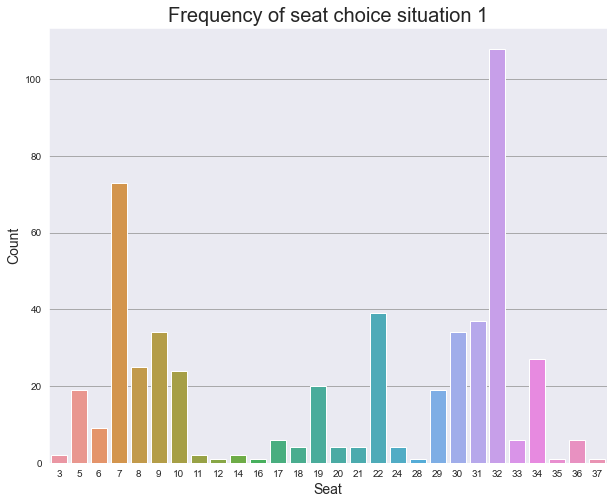

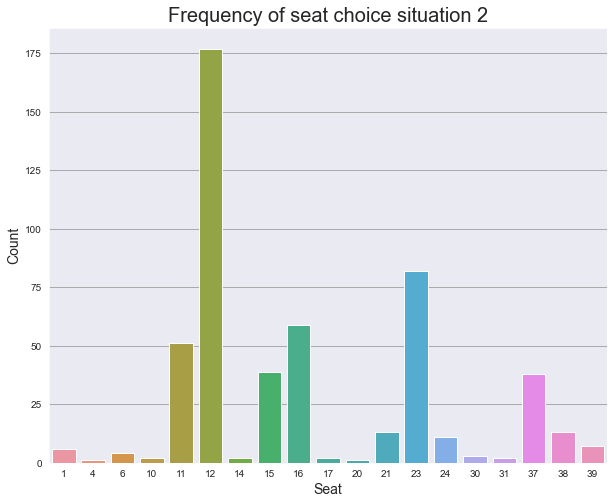

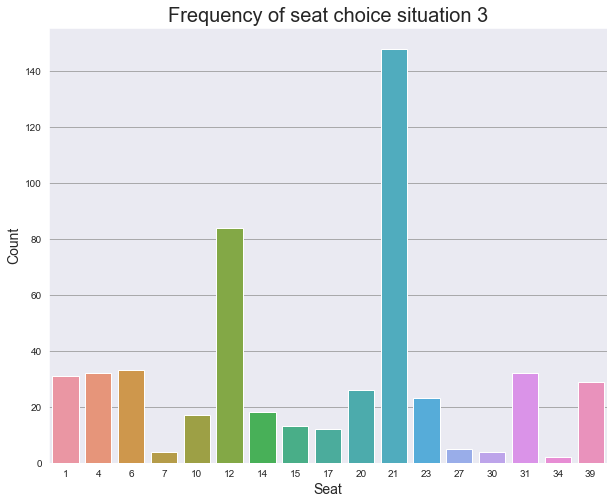

In [7]:
situations = [1, 2, 3]

for situation in situations:
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    #sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue='Gender', ax=ax)
    sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
    ax.set_title(f'Frequency of seat choice situation {situation}', fontsize=20)
    ax.set_xlabel('Seat', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    fig.savefig(f'figures/frequency_sit_{situation}.png')

In [15]:
grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
       2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
       21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
       22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

taken_sit_1 = [2, 13, 26, 39, 40]
taken_sit_2 = [2, 3, 5, 8, 9, 13, 18, 18, 22, 25, 26, 28, 29, 32, 33, 35, 36, 40]
taken_sit_3 = [2, 3, 5, 8, 9, 11, 13, 16, 18, 19, 22, 24, 25, 26, 28, 29, 32, 33, 35, 36, 37, 38, 40]

grid = np.array(grid).reshape(4,10)
grid

array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20],
       [21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
       [22, 24, 26, 28, 30, 32, 34, 36, 38, 40]])

In [55]:
dict_sit1 = survey_df.sort_values('Seat sit 1')['Seat sit 1'].value_counts().to_dict()
dict_sit2 = survey_df.sort_values('Seat sit 2')['Seat sit 2'].value_counts().to_dict()
dict_sit3 = survey_df.sort_values('Seat sit 3')['Seat sit 3'].value_counts().to_dict()

seats = grid
my_dict = dict_sit1

def make_count_array(seats, my_dict):
    total_counts = []
    for aisle in seats:
        if len(total_counts) == 2:
            aisle_counts = [0 for _ in range(len(total_counts[0]))]
            total_counts.append(aisle_counts)
        aisle_counts = []
        for row in aisle:
            count = my_dict.get(row, 0)
            aisle_counts.append(count)
        total_counts.append(aisle_counts)
    counts_array = np.array(total_counts)
    return counts_array

taken_list = taken_sit_1

def make_taken_array(seats, taken_list):
    total_taken = []
    for aisle in seats:
        aisle_taken = []
        if len(total_taken) == 2:
            aisle_taken = [0 for _ in range(len(total_taken[0]))]
            total_taken.append(aisle_taken)
        aisle_taken = []
        for row in aisle:
            if row in taken_list:
                taken = 1
            else:
                taken = 0
            aisle_taken.append(taken)
        total_taken.append(aisle_taken)
    taken_array = np.array(total_taken)
    return taken_array
make_count_array(grid, dict_sit1)

array([[  0,   2,  19,  73,  34,   2,   0,   0,   6,  20],
       [  0,   0,   9,  25,  24,   1,   2,   1,   4,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,  19,  37,   6,   1,   1,   0],
       [ 39,   4,   0,   1,  34, 108,  27,   6,   0,   0]])

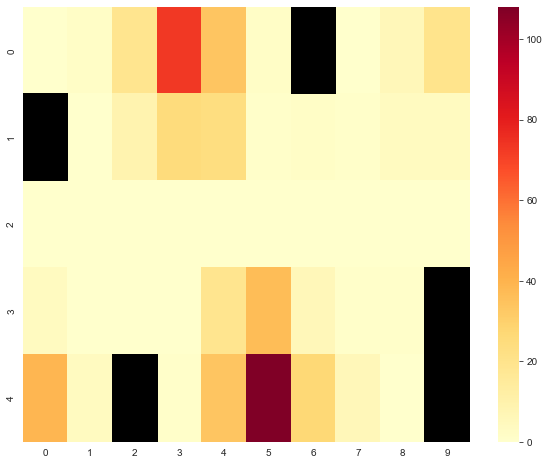

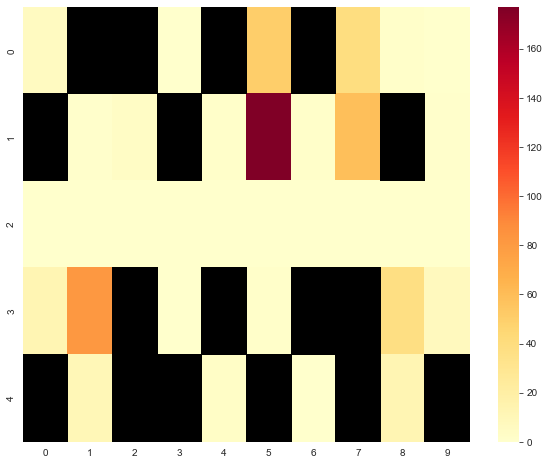

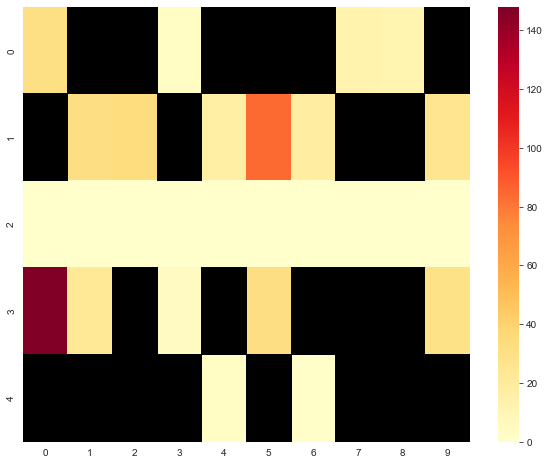

In [58]:
dicts = [dict_sit1, dict_sit2, dict_sit3]
taken_arrays = [taken_sit_1, taken_sit_2, taken_sit_3]

for index in range(len(dicts)):

    counts_array = make_count_array(grid, dicts[index])
    taken_array = make_taken_array(grid, taken_arrays[index])

    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.heatmap(data=counts_array, ax=ax, cmap='YlOrRd')
    sns.heatmap(data=taken_array, mask=taken_array==0, cmap='gist_gray', cbar=False, ax=ax)
